# Lloyd's algorithm and elbow method

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from kneed import KneeLocator
from copy import deepcopy

### Implementing Lloyd's algorithm

In [2]:
def initialize_centroids(X, k):
    """line 2: select k centroids from observations X"""
    # Randomly select k indices for X without replacement 
    rng = np.random.default_rng()
    idx = rng.choice(range(len(X)), size=k, replace=False)
    # Randomly select k samples from X without replacement 
    centroids = X[idx]
    if k == 1:
        centroids = centroids.reshape(1, -1)
    return centroids
    
def partition(X, centroids):
    """lines 3-6 and 9-10: partition X into clusters, and compute its cost"""
    # initialize empty clusters for each centroid
    clusters = [[] for _ in range(len(centroids))]
    cost = 0
    for xi in X:
        # Compute the distance from xi to each centroid
        dist_to_clusters = [np.linalg.norm(xi - c) for c in centroids]
        # Find clostest centroid
        closest_cluster = np.argmin(dist_to_clusters)
        # Append xi to the corresponding cluster
        clusters[closest_cluster].append(xi)
        # Update cost of partition
        cost += dist_to_clusters[closest_cluster]
    cost /= len(X)
    return clusters, cost

def update_centroids(clusters):
    """line 8: update centroids according to current partition"""
    centroids = [np.mean(c, axis=0) for c in clusters]
    return centroids

In [3]:
def lloyd(X, k, restarts=10, precision=0):
    """Implementation of Lloyd's algorithm"""
    
    best_cost = np.inf
    
    # Try with several random initializations
    for r in range(restarts):
        
        # Condition defining whether we should keep looping
        newer_is_better = True
        
        # Randomly initialize centroids
        prev_centroids = initialize_centroids(X, k)
        # Create first partition
        prev_clusters, prev_cost = partition(X, prev_centroids)
        
        # Optional exception: case k == 1, no need to restart
        if k == 1:
            best_centroids = np.copy(prev_centroids)
            best_clusters = deepcopy(prev_clusters)
            best_cost = prev_cost
            break
            
        while newer_is_better:
            
            # Update centroids
            new_centroids = update_centroids(prev_clusters)
            # Update partition and cost
            new_clusters, new_cost = partition(X, new_centroids)
            
            # Is the new clustering better than the previous one?
            newer_is_better = (abs(prev_cost - new_cost) > precision)
            
            if newer_is_better:
                # Keep looping and prepare next iteration
                prev_centroids = np.copy(new_centroids)
                prev_clusters = deepcopy(new_clusters)
                prev_cost = new_cost
            else:
                # Stop looping and go back to previous state 
                new_centroids = np.copy(prev_centroids)
                new_clusters = deepcopy(prev_clusters)
                new_cost = prev_cost
                
        # Keep the best clustering of all restarts
        if new_cost < best_cost:
            best_centroids = new_centroids
            best_clusters = new_clusters
            best_cost = new_cost
            print("New best cost: %.8f on restart %d" %(best_cost, r))
            
    return best_clusters, best_centroids, best_cost

### Load dataset

In [4]:
iris = load_iris()   
X = iris.data          
Y = iris.target       

### Training different Kmeans models

In [5]:
k_values = [i for i in range(1, 15)]
costs = []

for k in k_values:
    print(' ================= k =',k,' ================= ' )
    clusters, centroids, cost = lloyd(X, k)
    costs.append(cost)

 ================= k = 1  ================= 
 ================= k = 2  ================= 
New best cost: 0.85557777 on restart 0
 ================= k = 3  ================= 
New best cost: 0.64803049 on restart 0
 ================= k = 4  ================= 
New best cost: 0.56370703 on restart 0
New best cost: 0.56107765 on restart 1
New best cost: 0.55776565 on restart 3
 ================= k = 5  ================= 
New best cost: 0.58951223 on restart 0
New best cost: 0.51518685 on restart 1
New best cost: 0.51000000 on restart 2
New best cost: 0.50877641 on restart 3
 ================= k = 6  ================= 
New best cost: 0.49771854 on restart 0
New best cost: 0.49130517 on restart 1
New best cost: 0.46707340 on restart 3
 ================= k = 7  ================= 
New best cost: 0.47652816 on restart 0
New best cost: 0.46518946 on restart 4
New best cost: 0.43896290 on restart 5
 ================= k = 8  ================= 
New best cost: 0.44772897 on restart 0
New best cost: 0

### Selecting the best model using the elbow method

K selected using the elbow method:  3
Real number of clusters:            3


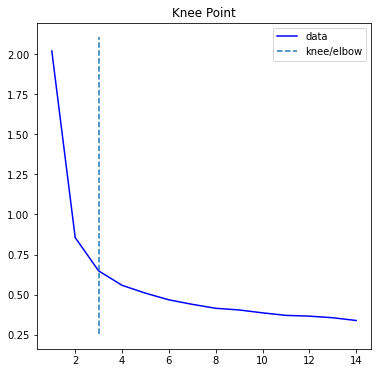

In [6]:
knee = KneeLocator(k_values, costs, curve="convex", direction="decreasing")
knee.plot_knee()
k_best = knee.elbow
print("K selected using the elbow method: ", k_best)
print("Real number of clusters:           ", len(np.unique(Y)))